Using simple nlp model

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

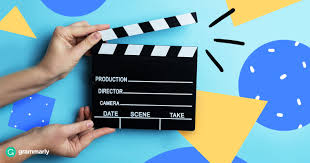

In [3]:
#Loading the dataset
df=pd.read_csv('/Users/Rashmi/Downloads/IMDB Dataset.csv')

In [4]:
#Checking for first five rows
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
#Checking no. of rows and columns
df.shape

(50000, 2)

In [6]:
#Checking for null values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
# Checking the values of output
df['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

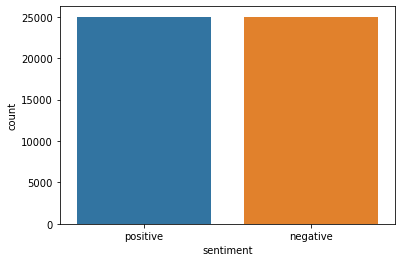

In [8]:
#Data visualisation
sns.countplot(x='sentiment',data=df)

Dataset is balanced and we can proceed the furthure steps

In [9]:
from textblob import TextBlob
review1= 'The film was awesome'
review2=' A wonderful little production'
blob1=TextBlob(review1)
blob2=TextBlob(review2)
print(blob1.sentiment)
print(blob2.sentiment)

Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.40625, subjectivity=0.75)


One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked

In [12]:
sentences=df['review']
le=LabelEncoder()
df['sentiment']= le.fit_transform(df['sentiment'])

Data visualization using word cloud for finding the most used words for each type of sentiment

In [13]:
#import tensorflow as tf
#from tensorflow import keras
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt


Stopwords are the English words which does not add much meaning to a sentence.

In [ ]:
A word cloud(tag cloud or weighted list) is a visual representation of text dat

(-0.5, 799.5, 799.5, -0.5)

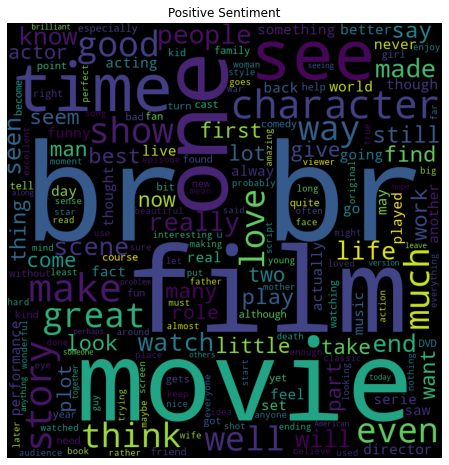

In [15]:
stopwords = set(STOPWORDS) 

pos=' '.join(map(str,sentences[df['sentiment']==1]))
neg=' '.join(map(str,sentences[df['sentiment']==0]))
  
wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(pos) 

plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.title('Positive Sentiment')
plt.axis('off')

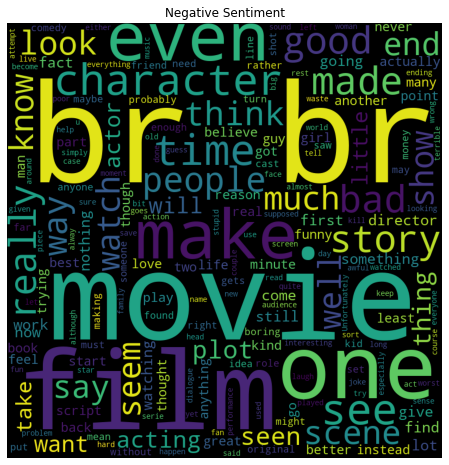

In [53]:
plt.figure(figsize=(8,8))
wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(neg) 

plt.imshow(wordcloud2)
plt.title('Negative Sentiment')
plt.axis('off')

plt.show() 

In [54]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string

In [ ]:
A preprocessor is a language that takes as input a text file written using some programming language syntax and 
output another text file following the syntax of another programming language

In [55]:
def custom_preprocessor(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [56]:
df['review']=df['review'].apply(custom_preprocessor)

In [57]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production br br the...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there s a family where a little boy ...,0
4,petter mattei s love in the time of money is...,1


Splitting of x and y varriable

In [59]:
y=df['sentiment']
x=df['review']

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary 
of known words, but also to encode new documents using that vocabulary

In [ ]:
parameter ngram_range=(a,b) where a is the minimum and b is the maximum size of ngrams you want to include in your 
features

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1,2))

In [63]:
x_train_trans=cv.fit_transform(x_train)

In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [44]:
lr.fit(x_train_trans,y_train)
pred_y=lr.predict(cv.transform(x_test))

/Users/Rashmi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.metrics import accuracy_score
score_1=accuracy_score(y_test,pred_y)

In [46]:
score_1

0.9031